In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_train)
len(x_test)

10000

In [ ]:
x_train.shape

(60000, 28, 28)

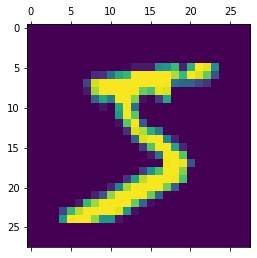

In [ ]:
plt.matshow(x_train[0])

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [27]:
# Sequesntial Model
model = keras.Sequential([
  layers.Dense(100, input_shape=(784,), activation="relu", name="hidden_layer"),
  layers.Dense(10, activation="sigmoid", name="output_layer")
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 100)               78500     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [29]:
model.fit(
    x=x_train_flattened,
    y=y_train,
    epochs=5,
)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2719 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1235 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0861 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0657 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0511 - accuracy: 0.9838


In [30]:
results = model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0721 - accuracy: 0.9776


In [31]:
predicted_results = model.predict(x_test_flattened)
predicted_results[0]

array([4.4957697e-02, 2.3883581e-04, 7.8171694e-01, 9.8562777e-01,
       1.3719617e-05, 1.2010664e-02, 2.3261114e-08, 9.9997246e-01,
       7.9993010e-02, 1.7576900e-01], dtype=float32)

In [32]:
y_predicted_labels = [np.argmax(i) for i in predicted_results]
np.argmax(predicted_results[0])

7

In [33]:
y_test[0]

7

In [34]:
cm = tf.math.confusion_matrix(
    labels=y_test,
    predictions=y_predicted_labels
)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    4,    0,    2,    1,    3,    1,    4,    2],
       [   0, 1125,    4,    0,    0,    1,    2,    0,    3,    0],
       [   0,    2, 1018,    1,    1,    0,    2,    1,    5,    2],
       [   0,    0,    7,  989,    0,    4,    0,    4,    5,    1],
       [   0,    0,    9,    0,  955,    0,    3,    1,    0,   14],
       [   2,    0,    0,   12,    2,  870,    3,    0,    2,    1],
       [   4,    3,    2,    1,    3,    5,  937,    0,    2,    1],
       [   1,    4,   12,    5,    4,    0,    0,  993,    2,    7],
       [   3,    1,    4,    6,    3,    4,    2,    2,  945,    4],
       [   3,    5,    0,    5,    6,    2,    0,    4,    3,  981]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

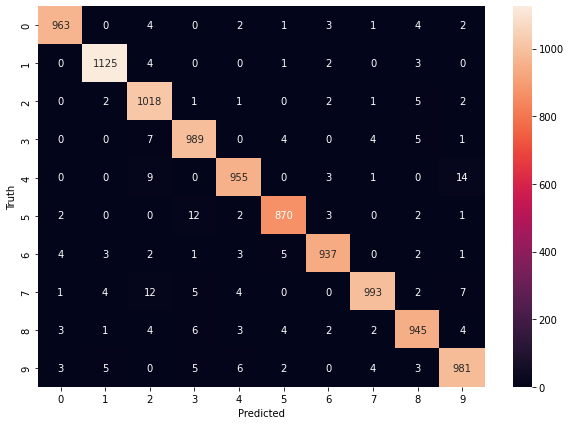

In [35]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')